# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [ ]:
%matplotlib inline
# import numpy and pandas
import pandas as pd
import numpy as np

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [ ]:
# Run this code:
from google.colab import drive
drive.mount('/content/drive')

fifa = pd.read_csv('/content/drive/MyDrive/Ironhack/Laboratorios/02 Módulo 2/lab-correlation-tests-with-scipy/your-code/fifa.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's examine the dataset by looking at the `head`.

In [ ]:
# Your code here:
fifa.head()
fifa.info()
fifa.describe()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell and assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions or thousands but converting them carefully into the same scale. 

In [ ]:
fifa['ValueNumeric'] =  fifa.Value.str.replace("[€K]","")
fifa['ValueNumeric'] = np.where(fifa['ValueNumeric'].str.find('M')!=-1,
                              fifa['ValueNumeric'].str.replace('M',"").astype('float64'),
                              fifa['ValueNumeric'].str.replace('M',"").astype('float64')/1000)
fifa.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,Right,CM,2.0,54.0,57.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,0.06
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,Right,ST,2.0,41.0,39.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,0.06
18204,B. Worman,16,England,47,67,Cambridge United,€60K,Right,ST,3.0,70.0,69.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,0.06
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,Right,RW,3.0,61.0,60.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,0.06
18206,G. Nugent,16,England,46,66,Tranmere Rovers,€60K,Right,CM,3.0,57.0,55.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,0.06


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

What is your conclusion from this ANOVA?

In [ ]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
fifa_lm = ols('ValueNumeric ~ C(Position) * C(fifa["Preferred Foot"])', data=fifa).fit()
fifa_tabla = anova_lm(fifa_lm)
fifa_tabla

,df,sum_sq,mean_sq,F,PR(>F)
C(Position),26.0,16496.092002,634.465077,20.957327,6.868224e-97
"C(fifa[""Preferred Foot""])",1.0,234.162243,234.162243,7.734728,5.422475e-03
"C(Position):C(fifa[""Preferred Foot""])",26.0,5152.827941,198.185690,6.546369,5.153228e-23
Residual,18093.0,547750.032080,30.274141,NaN,NaN


In [ ]:
# Your conclusions here:

# There is a statistically significant diference between the preferred foot. 

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [ ]:
# Your code here:
fifa_lm2 = ols('ValueNumeric ~ C(Nationality)', data = fifa).fit()
fifa_tabla2 = anova_lm(fifa_lm2)
fifa_tabla2

,df,sum_sq,mean_sq,F,PR(>F)
C(Nationality),163.0,32812.244217,201.302112,6.762478,4.840477e-134
Residual,18043.0,537095.118316,29.767506,NaN,NaN


What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [ ]:
# Your code here:

missing_val = fifa.isnull().sum()
missing_val

fifa.dropna(inplace=True)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.50
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.00
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.50
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.00
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,Right,CM,2.0,54.0,57.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,0.06
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,Right,ST,2.0,41.0,39.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,0.06
18204,B. Worman,16,England,47,67,Cambridge United,€60K,Right,ST,3.0,70.0,69.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,0.06
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,Right,RW,3.0,61.0,60.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,0.06


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [ ]:
# Your code here:
X = sm.add_constant(fifa[['Stamina','SprintSpeed',]])
Y = fifa.ValueNumeric
model = sm.OLS(Y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          8.04e-193
Time:                        03:52:48   Log-Likelihood:                -55952.
No. Observations:               17918   AIC:                         1.119e+05
Df Residuals:                   17915   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0700      0.197    -15.600      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:
# The R-squared is too low, which means 4.8% of the variation is been explained by the model


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [ ]:
# Your code here:

X = sm.add_constant(fifa['Potential']) 
y = fifa.ValueNumeric

model_2 = sm.OLS(y, X).fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        04:03:01   Log-Likelihood:                -52728.
No. Observations:               17918   AIC:                         1.055e+05
Df Residuals:                   17916   BIC:                         1.055e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.4390      0.400    -88.693      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:
# The pvalue less tan 0.05 means 'potential' features is a statistically sifnigicant predictor, however the  model is also weak, given a Rsquared of 3.3 
# This model can improve. 


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

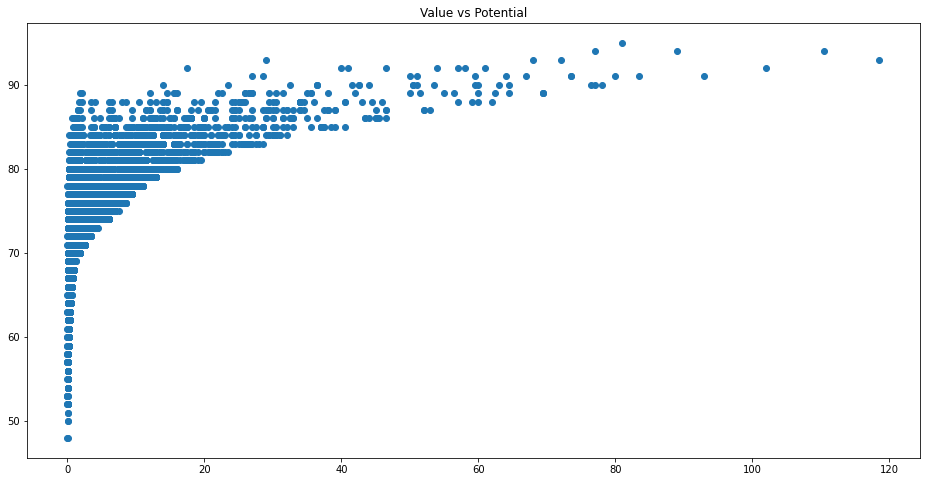

In [ ]:
# Your code here:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title('Value vs Potential')
plt.scatter(fifa.ValueNumeric,fifa.Potential)